<h1>What Day is the Weekly High/Low</h1>
The Judas swing term was named by <a href="https://www.youtube.com/channel/UCtjxa77NqamhVC8atV85Rog">The Inner Circle Trader</a>, the idea is, the market makers will rally or sell price, normally just above or below a key level tricking buyers or sellers into the market to follow its direction. As the Judas swing high or low is formed, price is quickly reversed either taking out stops and or leaving traders out of the game. In simpler words, the judas swing is the "False Run" that trips up traders that lack the understanding of the true direction of the day. The underlying idea is that if the market is bullish then market makers will send the price lower first to get a better price and then move it in the bullish direction. 
<br></br>
<p style='text-align:center'> <b> The focus of this analysis is to "profile" the GBPUSD trading pair to provide information that could better help with trading.</b></p>

<h2> Loading the TradingView Data </h2>
It is important that when downloading data from TradingView that there aren't any indicators on the charts. Indicators will add new columns to the dataframe when importing data. Additionally the data that was downloaded for this project was downloading using ISO Time. 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [12]:
#Weekly Data Starts on Sunday
weekly = pd.read_csv("FOREXCOM_GBPUSD, 1W.csv", index_col = "time", parse_dates=True)
weekly.rename(columns={'open':'Wopen','high':'Whigh','low':'Wlow', 'close':'Wclose'}, inplace = True)

#Daily Data Merges Friday Data into Thursday
daily = pd.read_csv("FOREXCOM_GBPUSD, 1D.csv", index_col = "time", parse_dates=True)
daily.rename(columns={'open':'Dopen','high':'Dhigh','low':'Dlow', 'close':'Dclose'}, inplace = True)

<b>NOTE: The data from trading view is in GMT and not in your local time. For example, I'm in GMT-5 (New York) time so what is considered "Sunday" for me is actually Sunday 17:00 to Monday 17:00 in my local time.</b>
   
<p style='text-align:center'><i>I will be looking through the lens of US/Eastern time </i></p>

In [36]:
weekly.index = weekly.index.tz_convert('US/Eastern')

In [37]:
weekly.head()

,Wopen,Whigh,Wlow,Wclose,Week Number
time,,,,,
2013-01-27 17:00:00-05:00,1.57616,1.58784,1.56746,1.56944,2013-04
2013-02-03 17:00:00-05:00,1.56944,1.58447,1.56307,1.58015,2013-05
2013-02-10 17:00:00-05:00,1.58015,1.58101,1.54618,1.55056,2013-06
2013-02-17 17:00:00-05:00,1.55056,1.55097,1.50717,1.50760,2013-07
2013-02-24 17:00:00-05:00,1.50760,1.52221,1.49858,1.50450,2013-08


In [38]:
weekly.index.min(), weekly.index.max()

(Timestamp('2013-01-27 17:00:00-0500', tz='US/Eastern'),
 Timestamp('2020-05-10 17:00:00-0400', tz='US/Eastern'))

In [39]:
daily.index = daily.index.tz_convert('US/Eastern')

In [40]:
daily.head()

,Dopen,Dhigh,Dlow,Dclose,Week Number
time,,,,,
2014-01-09 17:00:00-05:00,1.64810,1.65171,1.63820,1.64807,2014-01
2014-01-11 17:00:00-05:00,1.64807,1.64876,1.64807,1.64859,2014-01
2014-01-12 17:00:00-05:00,1.64859,1.65080,1.63473,1.63827,2014-02
2014-01-13 17:00:00-05:00,1.63827,1.64646,1.63678,1.64399,2014-02
2014-01-14 17:00:00-05:00,1.64399,1.64442,1.63225,1.63708,2014-02


In [41]:
daily.index.min(), daily.index.max()

(Timestamp('2014-01-09 17:00:00-0500', tz='US/Eastern'),
 Timestamp('2020-05-14 17:00:00-0400', tz='US/Eastern'))

<br />
<p style='text-align:center'>There is weekly price data from January 2013 - May 2020 and daily price data from January 2014 - May 2020. </p>

<h2>What Day Does the Weekly Low/High Occur?</h2>
Assuming the Judas Swing idea is accurate then if we anticipate the week to be bullish, then the price should go down before it goes up.

<h4>Determine What Week the Date is In</h4>

In [42]:
weekly["Week Number"]= weekly.index.strftime('%Y-%U')

In [43]:
daily["Week Number"] = daily.index.strftime('%Y-%U')

<h4>Merge the Dataframes on the Week Number</h4>

In [44]:
daily_weekly = daily.reset_index().merge(weekly, on="Week Number").set_index("time")

In [45]:
daily_weekly.head()

,Dopen,Dhigh,Dlow,Dclose,Week Number,Wopen,Whigh,Wlow,Wclose
time,,,,,,,,,
2014-01-09 17:00:00-05:00,1.64810,1.65171,1.63820,1.64807,2014-01,1.63981,1.65171,1.63373,1.64859
2014-01-11 17:00:00-05:00,1.64807,1.64876,1.64807,1.64859,2014-01,1.63981,1.65171,1.63373,1.64859
2014-01-12 17:00:00-05:00,1.64859,1.65080,1.63473,1.63827,2014-02,1.64859,1.65080,1.63097,1.64193
2014-01-13 17:00:00-05:00,1.63827,1.64646,1.63678,1.64399,2014-02,1.64859,1.65080,1.63097,1.64193
2014-01-14 17:00:00-05:00,1.64399,1.64442,1.63225,1.63708,2014-02,1.64859,1.65080,1.63097,1.64193


<h4>Determine if the Day Was the High or Low of the Week</h4>

In [46]:
def isBullBear(row):
    """
    Determines if the week was a bullish week or a bearish week 
    by comparing the weekly open and weekly close
    """
    if row['Wopen'] < row['Wclose']:
        return "Bull"
    else: 
        return "Bear"

In [47]:
def isLowHighEntry(row):
    """
    Determines if the day was the low of the week, when the week turned out to be bullish
    or
    If the day was the high of the week, when the week turned out to be bearish
    """
    if row['Wopen'] <= row['Wclose']: #Bullish Case
        if row['Dlow'] == row['Wlow']:
            return 1
        else:
            return 0
    else: #Bearish Case
        if row['Dhigh'] == row['Whigh']:
            return 1
        else:
            return 0

In [48]:
daily_weekly["Bull/Bear"] = daily_weekly.aggregate(isBullBear, axis='columns')
daily_weekly['Low/High-Entry'] = daily_weekly.aggregate(isLowHighEntry, axis='columns')

In [49]:
daily_weekly.head()

,Dopen,Dhigh,Dlow,Dclose,Week Number,Wopen,Whigh,Wlow,Wclose,Bull/Bear,Low/High-Entry
time,,,,,,,,,,,
2014-01-09 17:00:00-05:00,1.64810,1.65171,1.63820,1.64807,2014-01,1.63981,1.65171,1.63373,1.64859,Bull,0
2014-01-11 17:00:00-05:00,1.64807,1.64876,1.64807,1.64859,2014-01,1.63981,1.65171,1.63373,1.64859,Bull,0
2014-01-12 17:00:00-05:00,1.64859,1.65080,1.63473,1.63827,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,1
2014-01-13 17:00:00-05:00,1.63827,1.64646,1.63678,1.64399,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0
2014-01-14 17:00:00-05:00,1.64399,1.64442,1.63225,1.63708,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0


<p style='text-align:center'><b>Now that the data is in place, we can ignore the specific dates and focus only on what day of the week it was.</b></p>

In [50]:
no_dates_df = daily_weekly.reset_index()
no_dates_df['time']= no_dates_df['time'].dt.strftime("%A")
no_dates_df.set_index('time', inplace = True)

In [51]:
no_dates_df.head(10)

,Dopen,Dhigh,Dlow,Dclose,Week Number,Wopen,Whigh,Wlow,Wclose,Bull/Bear,Low/High-Entry
time,,,,,,,,,,,
Thursday,1.64810,1.65171,1.63820,1.64807,2014-01,1.63981,1.65171,1.63373,1.64859,Bull,0
Saturday,1.64807,1.64876,1.64807,1.64859,2014-01,1.63981,1.65171,1.63373,1.64859,Bull,0
Sunday,1.64859,1.65080,1.63473,1.63827,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,1
Monday,1.63827,1.64646,1.63678,1.64399,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0
Tuesday,1.64399,1.64442,1.63225,1.63708,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0
Wednesday,1.63708,1.63832,1.63150,1.63538,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0
Thursday,1.63538,1.64588,1.63097,1.64145,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0
Saturday,1.64145,1.64225,1.64145,1.64193,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0
Sunday,1.64193,1.64522,1.63958,1.64284,2014-03,1.64193,1.66683,1.63958,1.65045,Bull,1


<h4>Count Which Day of the Week Had the Most Low/High Data</h4>

In [57]:
no_dates_df.groupby('time').apply(sum).sort_values(by='Low/High-Entry', ascending = False)['Low/High-Entry']

time
Sunday       175
Monday        74
Wednesday     37
Tuesday       32
Thursday      12
Saturday       0
Name: Low/High-Entry, dtype: int64

<br />
Out of the 330 Weeks (~6.25 years) of data the (High if Bear)/(Low if Bull) of the Week appears mainly on Sunday 17:00 to Monday 17:00 (53%). However if we extend that to Tuesday at 17:00 then the chances that the (High if Bear)/(Low if Bull) already occured increases to 75%. Adding Tuesday 17:00 to Wednesday 17:00 the chances increase the chances to 85%. 

The downfall of this analysis is that the data is historical and already knew the nature of the week. When live trading, we can only "guess" whether the week will be bullish or bearish. If we are confident of the direction of the week using some other methods, then we now have a general idea of which day we can expect to see the Low/High form. 

<p style='text-align:center'><b>A Simple Strategy Implementing The Analysis:</b> Predict the direction of the week (bullish) - Enter a market buy trade at the Tuesday open with the lowest point of the current week as your stop loss. 

<h2>What Day Does the Opposite End Form></h2>
When making a trade, both the entry and the exit is important. In the last section I found were the lowest point was (in the bull case), in this section I will find on what day the high of the week (in the bull case) occurs.

In [58]:
def isLowHighExit(row):
    """
    Determines if the day was the high of the week, when the week turned out to be bullish
    or
    If the day was the low of the week, when the week turned out to be bearish
    """
    if row["Wopen"] < row["Wclose"]: #Bullish Case
        if row['Dhigh'] == row["Whigh"]:
            return 1
        else:
            return 0
    else: #Bearish Case
        if row["Dlow"] == row["Wlow"]:
            return 1
        else:
            return 0

In [59]:
no_dates_df["Low/High-Exit"] = no_dates_df.aggregate(isLowHighExit, axis='columns')

In [62]:
no_dates_df

,Dopen,Dhigh,Dlow,Dclose,Week Number,Wopen,Whigh,Wlow,Wclose,Bull/Bear,Low/High-Entry,Low/High-Exit
time,,,,,,,,,,,,
Sunday,459.58249,461.17173,457.82744,459.41411,2014-022014-032014-042014-052014-062014-072014...,459.58249,463.75410,454.95180,459.12637,BearBullBearBearBullBearBullBullBearBearBullBe...,175,0
Monday,459.47462,461.32851,457.45744,459.39883,2014-022014-032014-042014-052014-062014-072014...,459.64908,463.82703,455.04427,459.20567,BearBullBearBearBullBearBullBullBearBearBullBe...,74,0
Wednesday,455.16420,457.08309,453.29195,455.17492,2014-022014-032014-042014-052014-062014-072014...,455.22236,459.37006,450.65747,454.80866,BearBullBearBearBullBearBullBullBearBearBullBe...,37,0
Tuesday,456.77878,458.74006,455.03231,456.98455,2014-022014-032014-042014-052014-062014-072014...,457.04096,461.18687,452.44838,456.58936,BearBullBearBearBullBearBullBullBearBearBullBe...,32,0
Thursday,455.41237,457.15408,453.21762,455.05312,2014-012014-022014-032014-042014-052014-062014...,455.44314,459.60034,450.88660,455.04668,BullBearBullBearBearBullBearBullBullBearBearBu...,12,0
Saturday,32.62844,32.64582,32.60461,32.62200,2014-012014-022014-032014-042014-052014-062014...,32.65741,32.86923,32.41115,32.62200,BullBearBullBearBearBullBearBullBullBearBearBu...,0,0


In [61]:
no_dates_df.groupby('time').apply(sum).sort_values(by='Low/High-Exit', ascending=True)['Low/High-Exit']

time
Monday       0
Saturday     0
Sunday       0
Thursday     0
Tuesday      0
Wednesday    0
Name: Low/High-Exit, dtype: int64

In [12]:
final_data_ext1 = ext1.reset_index()
final_data_ext1['time'] = final_data_ext1['time'].dt.strftime('%A')
final_data_ext1.set_index('time', inplace=True)

In [13]:
final_data_ext1 = final_data_ext1.groupby('time').apply(sum).sort_values(by='Low/HighExit',ascending=False)

In [14]:
final_data_ext1['Low/HighExit']

time
Thursday     179
Wednesday     76
Tuesday       37
Monday        26
Sunday         8
Saturday       4
Name: Low/HighExit, dtype: int64

### 23% of the time the Low/HighExit appeared by Tuesday 17:00 to Wednesday 17:00. 23% of the time the Low/HighExit appeared on Wednesday 17:00 to Thursday 17:00. About half of the time the Low/HighExit will appear by Wednesday 17:00 to Thursday 17:00. The other half the Low/High will appear on Thursday 17:00 to Friday 17:00. 

# Extension 2 - How Many Times Does the High & Low Happen on the Same Day 

In [15]:
ext2 = combined.copy()

def sameHighLow(row):
    if row['Dlow'] == row['Wlow'] and row['Dhigh'] == row['Whigh']: return 1
    else: return 0

ext2['SameDayLH'] = ext2.aggregate(sameHighLow, axis='columns')

In [16]:
final_data_ext2 = ext2.reset_index()
final_data_ext2['time'] = final_data_ext2['time'].dt.strftime('%A')
final_data_ext2.set_index('time',inplace=True)
final_data_ext2 = final_data_ext2.groupby('time').apply(sum).sort_values(by='SameDayLH', ascending=False)

In [17]:
final_data_ext2['SameDayLH']

time
Thursday     3
Monday       2
Tuesday      2
Sunday       1
Wednesday    1
Saturday     0
Name: SameDayLH, dtype: int64

### It is very rare the the low and high appear on the same day (~3%). To simply my analysis and implementation of this idea, I will operate under the conclusion that the weekly low/high never appears on the same day.

### Statistics Exploration Question: Now that I know that Weekly Highs/Low don't form on the same day: How can I use conditional probabilities to determine when the best days are for an entry and an exit for the simple strategy? Also are entry and exit days correlated?

# Extension 4 - How Many Pips is the Low to High or Vice Versa

In [86]:
ext4 = combined.copy()
ext4["Daily Range"] = (ext4["Dhigh"] - ext4['Dlow']) * 10000
ext4["100 Day Range Average"] = ext4["Daily Range"].rolling(window=100).mean()
ext4.head()

,Dopen,Dhigh,Dlow,Dclose,Week Number,Wopen,Whigh,Wlow,Wclose,Low/HighEntry,Bull/Bear,Daily Range,100 Day Range Average
time,,,,,,,,,,,,,
2014-01-09 22:00:00,1.64810,1.65171,1.63820,1.64807,2014-01,1.63981,1.65171,1.63373,1.64859,0,Bull,135.1,NaN
2014-01-11 22:00:00,1.64807,1.64876,1.64807,1.64859,2014-01,1.63981,1.65171,1.63373,1.64859,0,Bull,6.9,NaN
2014-01-12 22:00:00,1.64859,1.65080,1.63473,1.63827,2014-02,1.64859,1.65080,1.63097,1.64193,1,Bear,160.7,NaN
2014-01-13 22:00:00,1.63827,1.64646,1.63678,1.64399,2014-02,1.64859,1.65080,1.63097,1.64193,0,Bear,96.8,NaN
2014-01-14 22:00:00,1.64399,1.64442,1.63225,1.63708,2014-02,1.64859,1.65080,1.63097,1.64193,0,Bear,121.7,NaN


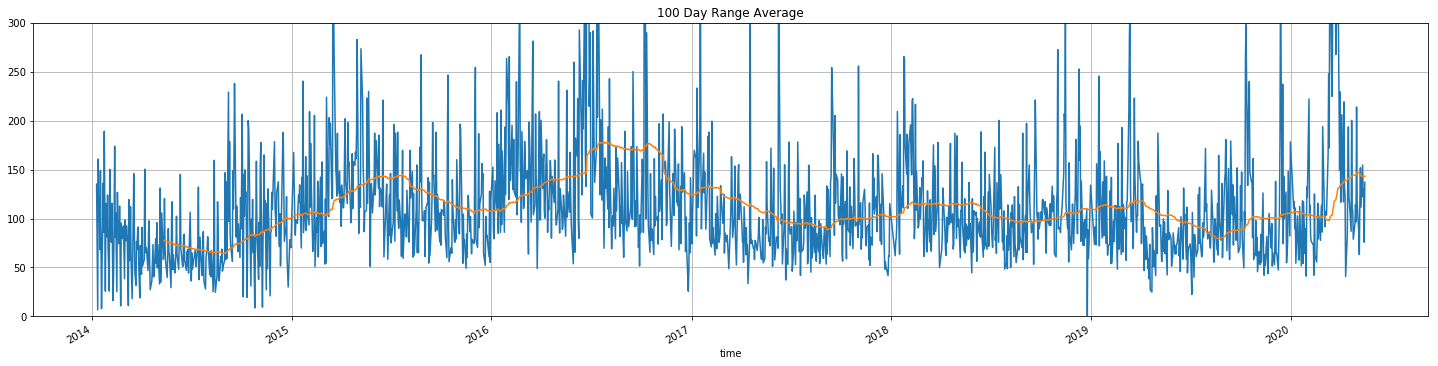

In [107]:
ext4['Daily Range'].plot(kind='line', ylim=(0,300))
ext4['100 Day Range Average'].plot(kind='line', figsize=(25,6), title="100 Day Range Average", grid = True)

### What does the 100 day range average tell us about how many pips to expect on a typical day. Is there a connection between trending conditions on this graph versus trending conditions in the market?

# Extension 5 - How Far Above/Below the Open Before the Move

In [94]:
ext5 = combined.copy()
ext5 = ext5[ext5["Low/HighEntry"] == 1]

def BeforeMove(row):
    if row['Bull/Bear'] == "Bull":
        return (row['Wopen'] - row['Wlow']) * 10000
    else:
        return (row['Whigh'] - row['Wopen']) * 10000

ext5['BeforeMove'] = ext5.aggregate(BeforeMove, axis='columns')
ext5['BeforeMove 100 Average'] = ext5['BeforeMove'].rolling(window=100).mean()

,Dopen,Dhigh,Dlow,Dclose,Week Number,Wopen,Whigh,Wlow,Wclose,Low/HighEntry,Bull/Bear,BeforeMove,BeforeMove 100 Average
time,,,,,,,,,,,,,
2014-01-12 22:00:00,1.64859,1.65080,1.63473,1.63827,2014-02,1.64859,1.65080,1.63097,1.64193,1,Bear,22.1,NaN
2014-01-19 22:00:00,1.64193,1.64522,1.63958,1.64284,2014-03,1.64193,1.66683,1.63958,1.65045,1,Bull,23.5,NaN
2014-01-27 22:00:00,1.65847,1.66252,1.65361,1.65789,2014-04,1.65045,1.66252,1.64153,1.64218,1,Bear,120.7,NaN
2014-02-02 22:00:00,1.64218,1.64408,1.62905,1.63043,2014-05,1.64218,1.64408,1.62521,1.63980,1,Bear,19.0,NaN
2014-02-09 22:00:00,1.63980,1.64274,1.63832,1.64025,2014-06,1.63980,1.67757,1.63832,1.67707,1,Bull,14.8,NaN
2014-02-16 22:00:00,1.67707,1.68228,1.66960,1.67141,2014-07,1.67707,1.68228,1.66122,1.66285,1,Bear,52.1,NaN
2014-02-23 22:00:00,1.66285,1.66790,1.65837,1.66561,2014-08,1.66285,1.67690,1.65837,1.67140,1,Bull,44.8,NaN
2014-03-03 22:00:00,1.66670,1.67168,1.66394,1.66639,2014-09,1.67140,1.67860,1.66394,1.67299,1,Bull,74.6,NaN
2014-03-09 21:00:00,1.67299,1.67415,1.66222,1.66450,2014-10,1.67299,1.67415,1.65688,1.66388,1,Bear,11.6,NaN


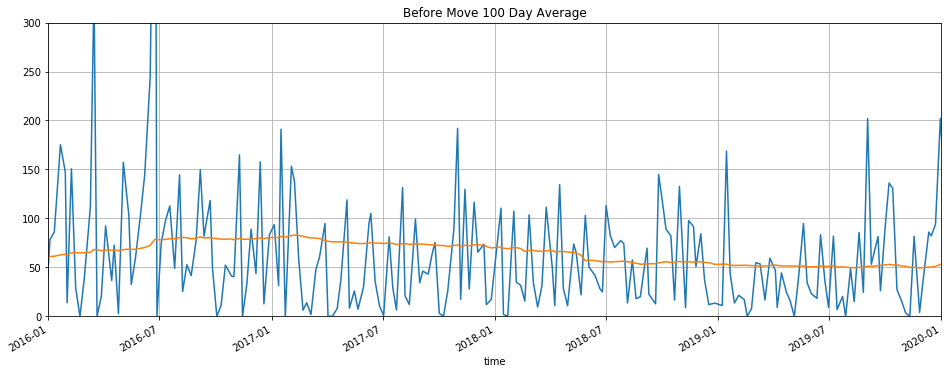

In [112]:
ext5['BeforeMove'].plot(kind='line',ylim=(0,300), xlim=('2016','2020'))
ext5['BeforeMove 100 Average'].plot(kind='line',grid=True,title="Before Move 100 Day Average", figsize=(16,6))

### Over time the pair has spent less pips on the accumulation side of the move for the week. The BeforeMove price consistently fluctuations above and below its 100 Day Average. Is it possible to approximate how much we can expect the BeforeMove value to be by looking at the previous week's data. 